In [24]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
dataset = []

In [11]:
folder_paths = [
    "E:/fruits-360/fruits-360_dataset/fruits-360/Training/Apple Braeburn",
    "E:/fruits-360/fruits-360_dataset/fruits-360/Training/Apple Crimson Snow",
    "E:/fruits-360/fruits-360_dataset/fruits-360/Training/Apple Golden 1"
]

In [12]:
# Iterate over the folder paths
for i in folder_paths:
    folder_name = os.path.basename(i)
    
    # Iterate over the images in the subdirectory
    for file_name in os.listdir(i):
        image_path = os.path.join(i, file_name)
        
        if os.path.isfile(image_path):  # Only consider files
            # Load the image using OpenCV
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            
            # If the image was successfully loaded
            if image is not None:
                # Resize the grayscale image to 250X250 pixels
                resized_image = cv2.resize(image, (250, 250))
                
                # Flatten the image and append each pixel as a separate feature along with the label to the dataset
                flattened_image = resized_image.flatten().tolist()
                dataset.append(flattened_image + [folder_name])

In [13]:
import pandas as pd
"""Convert the dataset to a pandas DataFrame"""
df = pd.DataFrame(dataset, columns=[f'pixel_{i+1}' for i in range(250*250)] + ['label'])

"""Print the DataFrame"""
df

,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,...,pixel_62492,pixel_62493,pixel_62494,pixel_62495,pixel_62496,pixel_62497,pixel_62498,pixel_62499,pixel_62500,label
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,Apple Braeburn
1,255,255,255,255,255,254,254,254,254,254,...,255,255,255,255,255,255,255,255,255,Apple Braeburn
2,254,254,254,255,255,255,255,254,254,254,...,255,255,255,255,255,255,255,255,255,Apple Braeburn
3,255,255,255,255,255,254,254,254,254,254,...,255,255,255,255,255,255,255,255,255,Apple Braeburn
4,255,255,254,254,254,254,254,253,253,253,...,255,255,255,255,255,255,255,255,255,Apple Braeburn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,Apple Golden 1
1412,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,Apple Golden 1
1413,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,Apple Golden 1
1414,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,Apple Golden 1


In [29]:
label_column = df.iloc[:, -1]
label_counts = label_column.value_counts()
label_counts

0    492
2    480
1    444
Name: Target, dtype: int64

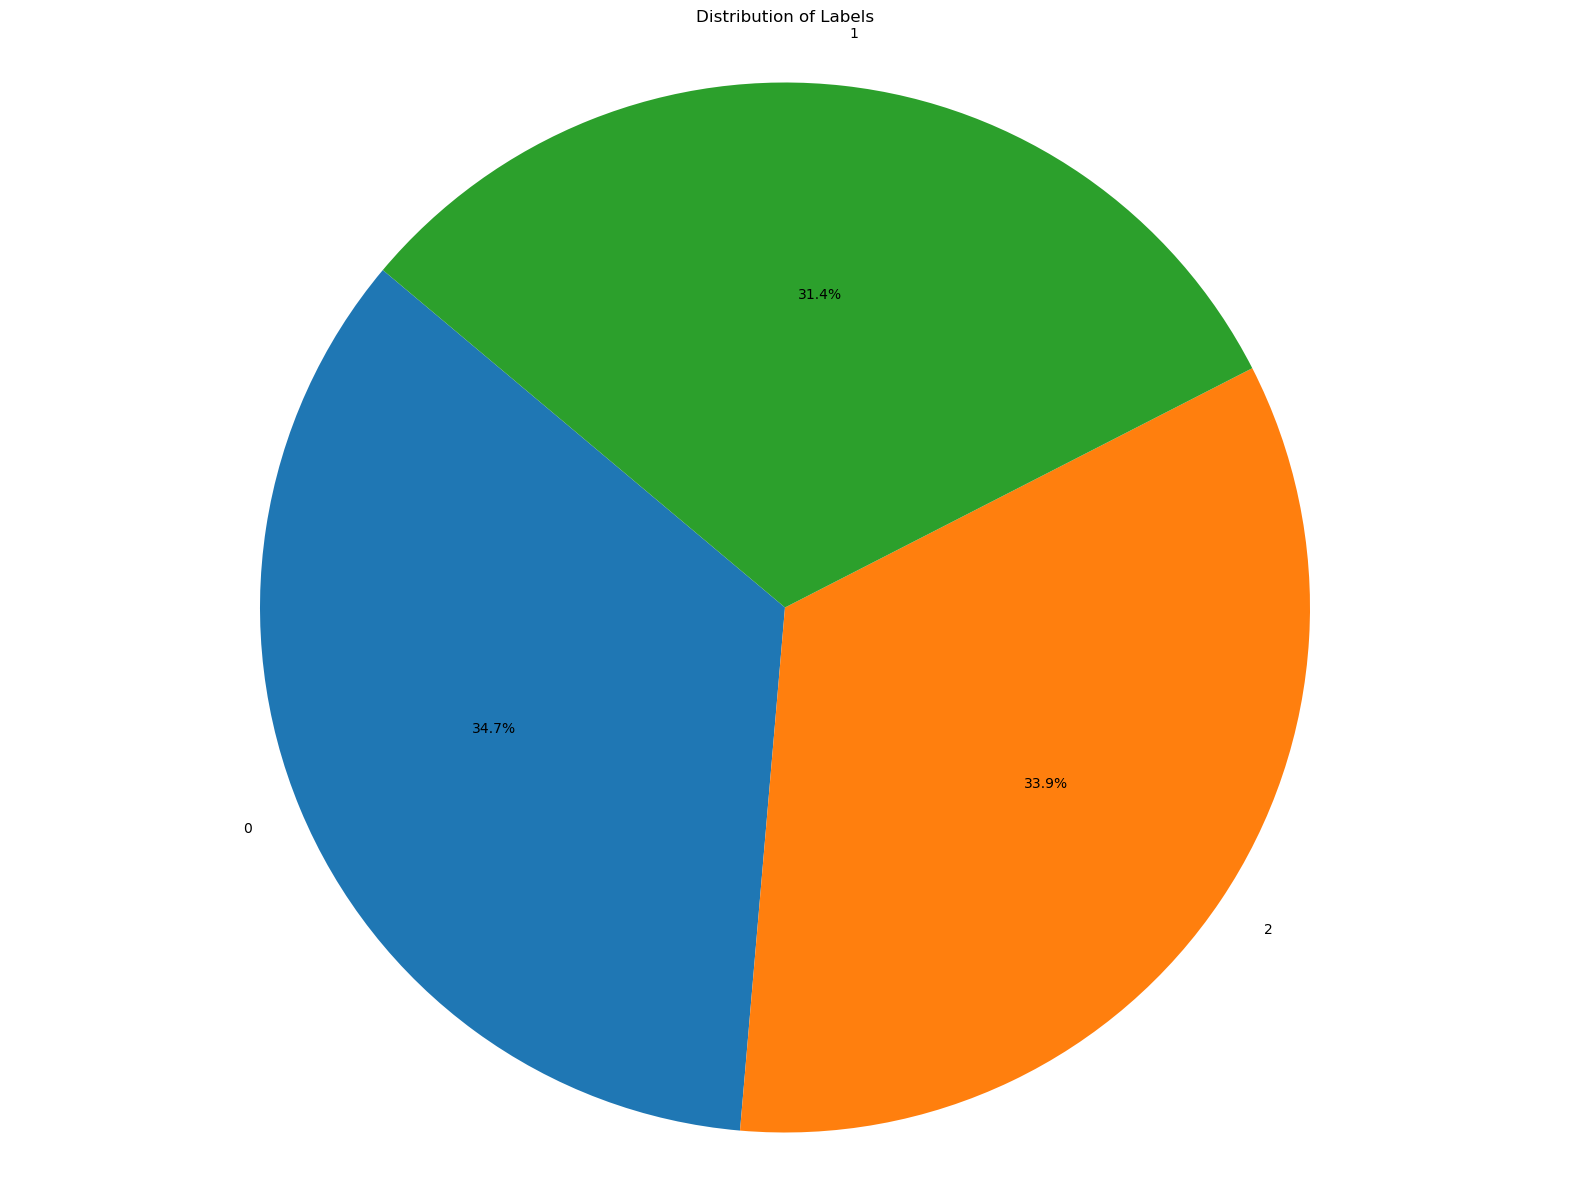

In [30]:
# Create a pie chart
plt.figure(figsize=(20, 15))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Labels')
plt.show()

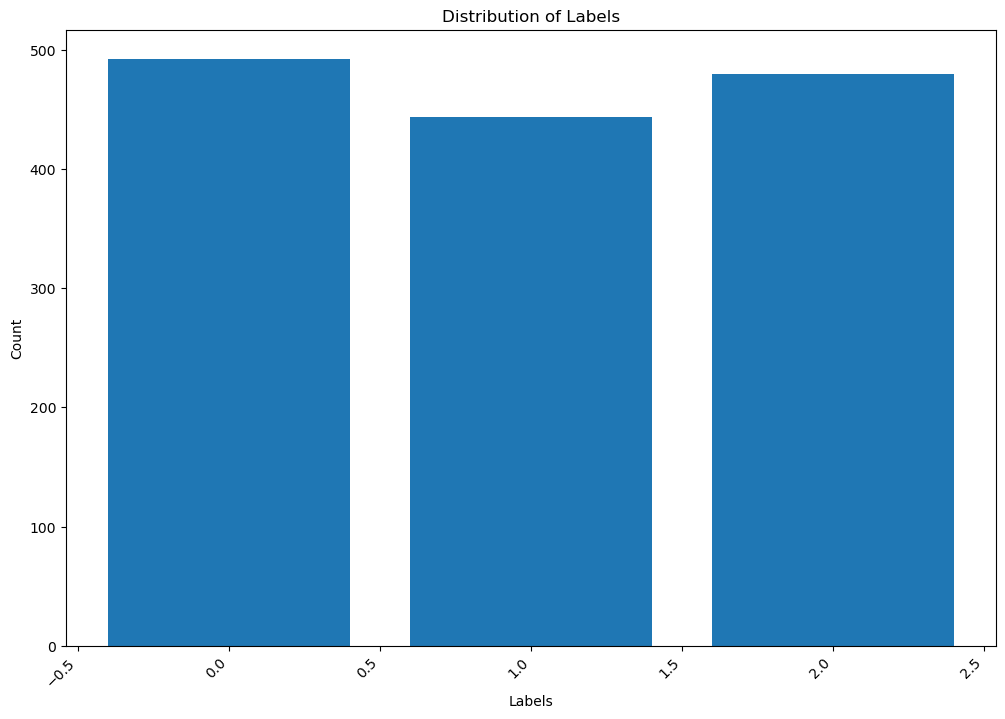

In [31]:
# Create a bar chart
plt.figure(figsize=(12, 8)) 
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.xticks(rotation=45, ha='right')  
plt.show()

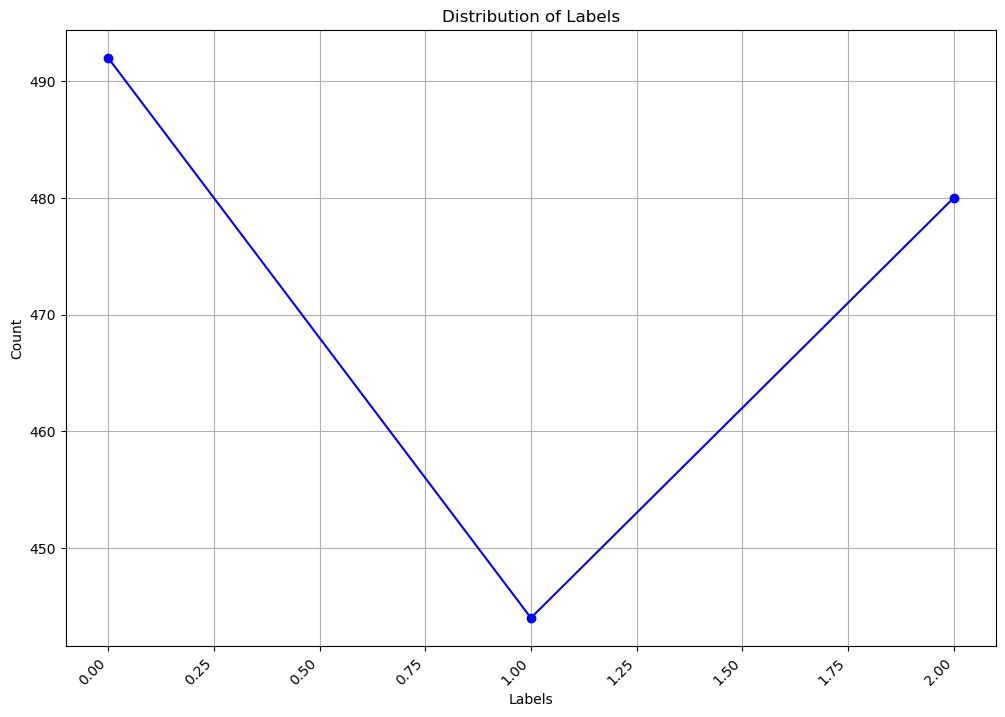

In [32]:
"""Sort the label counts by index (labels) for a more organized line graph"""
label_counts_sorted = label_counts.sort_index()
"""Create a line graph"""
"""Increase width to 12 inches and height to 8 inches"""
plt.figure(figsize=(12, 8))  
plt.plot(label_counts_sorted.index, label_counts_sorted.values, marker='o', linestyle='-', color='b')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels')
"""Rotate x-axis labels for better visibility"""
plt.xticks(rotation=45, ha='right')  
"""Add grid lines for better visualization"""
plt.grid(True)  
plt.show()

In [14]:
"Normalize the pixel values between 0 and 1"
X=df.iloc[:,:62500]
X=X/255
X

,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,...,pixel_62491,pixel_62492,pixel_62493,pixel_62494,pixel_62495,pixel_62496,pixel_62497,pixel_62498,pixel_62499,pixel_62500
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,0.996078,0.996078,0.996078,0.996078,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.996078,0.996078,0.996078,1.000000,1.000000,1.000000,1.000000,0.996078,0.996078,0.996078,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,0.996078,0.996078,0.996078,0.996078,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.000000,1.000000,0.996078,0.996078,0.996078,0.996078,0.996078,0.992157,0.992157,0.992157,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1412,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1413,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1414,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [15]:
Y=df.iloc[:,-1]
Y

0       Apple Braeburn
1       Apple Braeburn
2       Apple Braeburn
3       Apple Braeburn
4       Apple Braeburn
             ...      
1411    Apple Golden 1
1412    Apple Golden 1
1413    Apple Golden 1
1414    Apple Golden 1
1415    Apple Golden 1
Name: label, Length: 1416, dtype: object

In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Fit and transform the labels into numeric values
Y_encoded = label_encoder.fit_transform(Y)
Y_encoded

array([0, 0, 0, ..., 2, 2, 2])

In [17]:
y_series = pd.Series(Y_encoded, name='Target')

# Concatenate 'X' (features) and 'y_series' (target variable) along columns (axis=1)
df = pd.concat([X, y_series], axis=1)

# Print the merged DataFrame to check the result
df

,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,...,pixel_62492,pixel_62493,pixel_62494,pixel_62495,pixel_62496,pixel_62497,pixel_62498,pixel_62499,pixel_62500,Target
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
1,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,0.996078,0.996078,0.996078,0.996078,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
2,0.996078,0.996078,0.996078,1.000000,1.000000,1.000000,1.000000,0.996078,0.996078,0.996078,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
3,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,0.996078,0.996078,0.996078,0.996078,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
4,1.000000,1.000000,0.996078,0.996078,0.996078,0.996078,0.996078,0.992157,0.992157,0.992157,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2
1412,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2
1413,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2
1414,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2


In [18]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_series, test_size=0.2, random_state=42)

In [19]:
from sklearn.svm import SVC

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)


SVC(kernel='linear')

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict the labels for the test set
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        93
           2       1.00      1.00      1.00        97

    accuracy                           1.00       284
   macro avg       1.00      1.00      1.00       284
weighted avg       1.00      1.00      1.00       284

Confusion Matrix:
[[94  0  0]
 [ 0 93  0]
 [ 0  0 97]]


In [33]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        93
           2       1.00      1.00      1.00        97

    accuracy                           1.00       284
   macro avg       1.00      1.00      1.00       284
weighted avg       1.00      1.00      1.00       284

Confusion Matrix:
[[94  0  0]
 [ 0 93  0]
 [ 0  0 97]]


In [37]:
y_pred , y_test

(array([1, 1, 0, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1,
        0, 0, 0, 1, 1, 2, 2, 2, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 1, 1,
        0, 2, 0, 1, 1, 2, 0, 2, 0, 1, 0, 0, 2, 1, 1, 1, 0, 0, 2, 1, 1, 0,
        1, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 1, 0, 0, 1, 0, 2,
        2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 0, 2, 1, 0, 1, 2, 0, 2, 2, 1, 0, 1,
        2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
        1, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 2, 2, 2, 1, 1, 0, 1,
        1, 2, 1, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 0, 1, 2,
        2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 2, 0, 0, 1, 1, 2, 1, 1, 2, 1, 0, 2,
        0, 1, 0, 2, 0, 2, 0, 2, 1, 0, 0, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 2,
        1, 1, 2, 1, 0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1,
        2, 0, 2, 0, 2, 0, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0,
        1, 1, 0, 0, 1, 2, 1, 2, 2, 0, 0, 1, 2, 1, 2, 2, 0, 0, 2, 1]),
 812     1
 916     1
 339     0
 192     